In [ ]:
# Hier erstelle ich eine Distanzmatrix aus der ursprünglichen Datei für die Substitution

In [1]:
import pandas as pd
import data_cleanup as dc
import data_exploration as de

In [2]:
fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
df = pd.read_csv(fpath)


In [3]:
# Auftrennen der Mutante in alte und neue AS
mutations_df = dc.aufteilung_mut_pos(df)

In [4]:
# Gruppieren der Substitutionen, geordnet erst nach alter und dann nach neuer AS mit Inspiration von ChatGPT (.groupby in der Pandas Dokumentation beschreibt nur das groupen nach einem Parameter)
subs_df = mutations_df.groupby(["AS_old", "AS_new"])

# Berechnen des means für jede Kombination
mean_scores = subs_df.DMS_score.mean()


# Es gibt 380 Möglichkeiten, 20 AS mit Reihenfolge und ohne zurücklegen zu kombinieren. Aus den Mittelwerten dieser 380 möglichen Substitutionen soll nun eine Distanzmatrix erstellt werden.

In [5]:
# Da "mean_scores" eine Serie ist, muss diese erst wieder in ein Data Frame umgewandelt werden. Dafür müssen den einzelnen Zeilen wieder konkrete Indizes zugewiesen werden, damit wieder ein Data Frame entsteht.
mean_scores_df = mean_scores.reset_index()

# Pivot erstellt aus unserer in einem Data Frame aufgelisteten Substitutionen ein Data Frame, das in Form einer Tabelle eine Distanzmatrix zeigt. Die Reihen sind die alten AS, die Spalten die neuen AS.
distancematrix = mean_scores_df.pivot(index="AS_old", columns="AS_new", values= "DMS_score")

<Axes: xlabel='AS_new', ylabel='AS_old'>

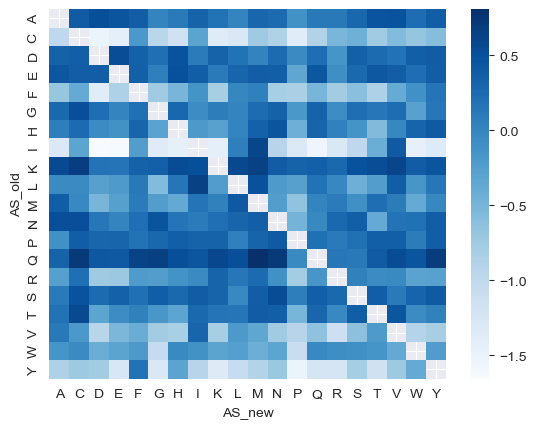

In [2]:
# Demonstration, das die Funktion in data_exploration (de) funktioniert
df1= pd.read_csv("../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv")
df2= pd.read_csv("../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv")

In [29]:
de.distance_matrix(df1)

/Users/frido/anaconda3/envs/topic02_team02/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


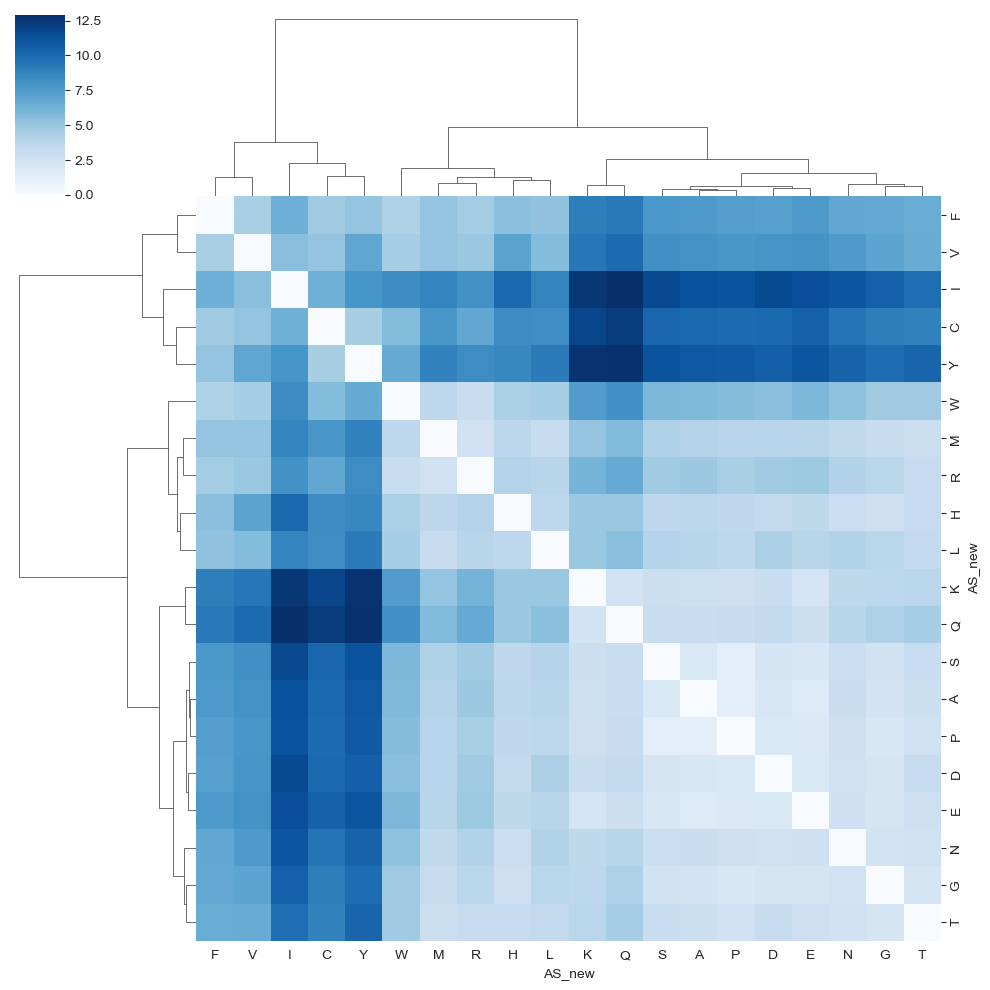